## <center>**BIBLIOGRAPHY REVIEW OF AI IN RADIOLOGY ARTICLES IN PUBMED**</center>

**Searches for X_ray, CT and MRI in different body regions (adding mammography for breast)**

**Filter: up to 31/12/2024**

### **1. Data pre-processing**

In [1]:
# Import libraries
import os
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

In [2]:
# Data
files = [file for file in os.listdir('Data') if '.csv' in file]
files

['Bone.csv',
 'CT.csv',
 'Abdomen_Prostate_MR.csv',
 'Abdomen_Kidney_MR.csv',
 'Thorax_Heart_MR.csv',
 'Brain_MR.csv',
 'Vacular.csv',
 'Bone_CT.csv',
 'Abdomen_Liver_MR.csv',
 'Head_&_Neck_MR.csv',
 'Head_&_Neck_CT.csv',
 'Abdomen_Liver_CT.csv',
 'X_ray.csv',
 'Bone_X_ray.csv',
 'Bone_MR.csv',
 'Spinal_cord.csv',
 'Brain.csv',
 'Brain_CT.csv',
 'Breast_MR.csv',
 'Thorax_Heart_CT.csv',
 'Head_&_Neck.csv',
 'Breast_Mammography.csv',
 'Abdomen_Kidney_CT.csv',
 'Thorax.csv',
 'MR.csv',
 'Breast.csv',
 'Abdomen_Pancreas_MR.csv',
 'Abdomen.csv',
 'Thorax_Lung_CT.csv',
 'SoftTissue.csv']

In [3]:
# Import data

# Techniques
df_xray =                pd.read_csv('Data/X_ray.csv',               header=1)
df_ct =                  pd.read_csv('Data/CT.csv',                  header=1)
df_mr =                  pd.read_csv('Data/MR.csv',                  header=1)

# Breast
df_breast =              pd.read_csv('Data/Breast.csv',              header=1)
df_breast_mammography =  pd.read_csv('Data/Breast_Mammography.csv',  header=1)
df_breast_mr =           pd.read_csv('Data/Breast_MR.csv',           header=1)

# Neuro
df_brain =               pd.read_csv('Data/Brain.csv',               header=1)
df_brain_ct =            pd.read_csv('Data/Brain_CT.csv',            header=1)
df_brain_mr =            pd.read_csv('Data/Brain_MR.csv',            header=1)
df_spinal_cord =         pd.read_csv('Data/Spinal_cord.csv',         header=1)

# Head & Neck
df_head_neck =           pd.read_csv('Data/Head_&_Neck.csv',         header=1)
df_head_neck_ct =        pd.read_csv('Data/Head_&_Neck_CT.csv',      header=1)
df_head_neck_mr =        pd.read_csv('Data/Head_&_Neck_MR.csv',      header=1)

# Thorax
df_thorax =              pd.read_csv('Data/Thorax.csv',              header=1)
df_thorax_lung_ct =      pd.read_csv('Data/Thorax_Lung_CT.csv',      header=1)
df_thorax_heart_ct =     pd.read_csv('Data/Thorax_Heart_CT.csv',     header=1)
df_thorax_heart_mr =     pd.read_csv('Data/Thorax_Heart_MR.csv',     header=1)

# Abdomen
df_abdomen =             pd.read_csv('Data/Abdomen.csv',             header=1)
df_abdomen_liver_ct =    pd.read_csv('Data/Abdomen_Liver_CT.csv',    header=1)
df_abdomen_liver_mr =    pd.read_csv('Data/Abdomen_Liver_MR.csv',    header=1)
df_abdomen_pancreas_mr = pd.read_csv('Data/Abdomen_Pancreas_MR.csv', header=1)
df_abdomen_kidney_ct =   pd.read_csv('Data/Abdomen_Kidney_CT.csv',   header=1)
df_abdomen_kidney_mr =   pd.read_csv('Data/Abdomen_Kidney_MR.csv',   header=1)
df_abdomen_prostate_mr = pd.read_csv('Data/Abdomen_Prostate_MR.csv', header=1)

# Bone
df_bone =                pd.read_csv('Data/Bone.csv',                header=1)
df_bone_xray =           pd.read_csv('Data/Bone_X_ray.csv',          header=1)
df_bone_ct =             pd.read_csv('Data/Bone_CT.csv',             header=1)
df_bone_mr =             pd.read_csv('Data/Bone_MR.csv',             header=1)

# Soft Tissues
df_softissues =          pd.read_csv('Data/SoftTissue.csv',          header=1)

# Vascular
df_vascular =            pd.read_csv('Data/Vacular.csv',             header=1)

In [4]:
# Create a list of dataframes and names

dfs_names = [
    'X_ray', 'CT', 'MR',
    'Breast', 'Breast_Mammography', 'Breast_MR',
    'Brain', 'Brain_CT', 'Brain_MR', 'Spinal_cord',
    'Head_&_Neck', 'Head_&_Neck_CT', 'Head_&_Neck_MR',
    'Thorax', 'Thorax_Lung_CT', 'Thorax_Heart_CT', 'Thorax_Heart_MR',
    'Abdomen', 'Abdomen_Liver_CT', 'Abdomen_Liver_MR', 'Abdomen_Pancreas_MR',
    'Abdomen_Kidney_CT', 'Abdomen_Kidney_MR', 'Abdomen_Prostate_MR',
    'Bone', 'Bone_X_ray', 'Bone_CT', 'Bone_MR',
    'SoftTissue',
    'Vacular'
]

dfs = [
    df_xray, df_ct, df_mr,
    df_breast, df_breast_mammography, df_breast_mr,
    df_brain, df_brain_ct, df_brain_mr, df_spinal_cord,
    df_head_neck, df_head_neck_ct, df_head_neck_mr,
    df_thorax, df_thorax_lung_ct, df_thorax_heart_ct, df_thorax_heart_mr,
    df_abdomen, df_abdomen_liver_ct, df_abdomen_liver_mr, df_abdomen_pancreas_mr,
    df_abdomen_kidney_ct, df_abdomen_kidney_mr, df_abdomen_prostate_mr,
    df_bone, df_bone_xray, df_bone_ct, df_bone_mr,
    df_softissues,
    df_vascular
]

In [5]:
# Print dataframes shapes
for i, df in enumerate(dfs):
    df_name = dfs_names[i]
    space1 = ' ' if i < 10 else ''
    space2 = ' ' * (20 - len(df_name))
    
    print(f'{i}{space1} - {df_name}:{space2}{df.shape}  -  {df.columns.to_list()}')

0  - X_ray:               (26, 2)  -  ['Year', 'Count']
1  - CT:                  (39, 2)  -  ['Year', 'Count']
2  - MR:                  (38, 2)  -  ['Year', 'Count']
3  - Breast:              (28, 2)  -  ['Year', 'Count']
4  - Breast_Mammography:  (27, 2)  -  ['Year', 'Count']
5  - Breast_MR:           (25, 2)  -  ['Year', 'Count']
6  - Brain:               (38, 2)  -  ['Year', 'Count']
7  - Brain_CT:            (34, 2)  -  ['Year', 'Count']
8  - Brain_MR:            (35, 2)  -  ['Year', 'Count']
9  - Spinal_cord:         (25, 2)  -  ['Year', 'Count']
10 - Head_&_Neck:         (28, 2)  -  ['Year', 'Count']
11 - Head_&_Neck_CT:      (24, 2)  -  ['Year', 'Count']
12 - Head_&_Neck_MR:      (23, 2)  -  ['Year', 'Count']
13 - Thorax:              (30, 2)  -  ['Year', 'Count']
14 - Thorax_Lung_CT:      (27, 2)  -  ['Year', 'Count']
15 - Thorax_Heart_CT:     (23, 2)  -  ['Year', 'Count']
16 - Thorax_Heart_MR:     (27, 2)  -  ['Year', 'Count']
17 - Abdomen:             (29, 2)  -  ['Year', '

In [6]:
# Merge dataframes
df_merge = dfs[0][['Year']].copy()

for df_, df_name in zip(dfs, dfs_names):
    df_merge = df_merge.merge(df_.rename(columns={'Count': df_name}), on='Year', how='outer')

# Replace NaN with 0 and convert datatypes to int
df_merge = df_merge.fillna(0).astype(int)

# Convert Year to Year datatype
df_merge['Year'] = pd.to_datetime(df_merge['Year'].astype(str), format='%Y').dt.to_period('Y')

# Sort by Year
df_merge = df_merge.sort_values(by='Year', ascending=True).reset_index(drop=True)

# Print dataframe
df_merge

,Year,X_ray,CT,MR,Breast,Breast_Mammography,Breast_MR,Brain,Brain_CT,Brain_MR,...,Abdomen_Pancreas_MR,Abdomen_Kidney_CT,Abdomen_Kidney_MR,Abdomen_Prostate_MR,Bone,Bone_X_ray,Bone_CT,Bone_MR,SoftTissue,Vacular
0,1986,1,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1987,0,4,1,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1988,0,3,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,0,4,2,0,0,0,2,2,0,...,0,0,0,0,1,0,1,0,0,0
4,1990,1,4,2,0,0,0,3,2,2,...,0,0,0,0,0,0,0,0,0,0
5,1991,0,5,3,0,0,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
6,1992,0,7,3,0,0,0,1,0,1,...,0,0,0,0,4,0,4,0,0,0
7,1993,0,5,10,0,0,0,5,1,4,...,0,0,0,0,0,0,0,0,0,0
8,1994,0,10,6,0,0,0,4,2,4,...,0,0,0,0,1,0,1,0,0,0
9,1995,0,12,15,1,1,0,6,3,3,...,0,0,0,0,3,0,3,0,0,0


In [7]:
# Check datatypes
df_merge.dtypes

Year                   period[Y-DEC]
X_ray                          int64
CT                             int64
MR                             int64
Breast                         int64
Breast_Mammography             int64
Breast_MR                      int64
Brain                          int64
Brain_CT                       int64
Brain_MR                       int64
Spinal_cord                    int64
Head_&_Neck                    int64
Head_&_Neck_CT                 int64
Head_&_Neck_MR                 int64
Thorax                         int64
Thorax_Lung_CT                 int64
Thorax_Heart_CT                int64
Thorax_Heart_MR                int64
Abdomen                        int64
Abdomen_Liver_CT               int64
Abdomen_Liver_MR               int64
Abdomen_Pancreas_MR            int64
Abdomen_Kidney_CT              int64
Abdomen_Kidney_MR              int64
Abdomen_Prostate_MR            int64
Bone                           int64
Bone_X_ray                     int64
B

In [8]:
# Save dataframe
df_merge.to_csv('Results/all_data_processed.csv')
df_merge.to_feather ('Results/all_data_processed.feather')

### **2. Exploring Data Analysis (EDA)**

* **2.1. EDA - Technique**
    * 2.1.1. EDA - Technique - Total Counts
    * 2.1.2. EDA - Technique - Correlation
    * 2.1.3. EDA - Technique - Analysis of Trends over Time
* **2.2. EDA - Body Region**
    * 2.2.1. EDA - Body Region - Total Counts
    * 2.2.2. EDA - Body Region - Correlation
    * 2.2.3. EDA - Body Region - Analysis of Trends over Time
* **3.3. EDA - Technique and Body Region**
    * 2.3.1. EDA - Technique and Body Region - Total Counts
    * 2.3.2. EDA - Technique and Body Region - Correlation
    * 2.3.3. EDA - Technique and Body Region - Analysis of Trends over Time

#### **2.1. EDA - Technique**

* 2.1.1. EDA - Technique - Total Counts
* 2.1.2. EDA - Technique - Correlation
* 2.1.3. EDA - Technique - Analysis of Trends over Time

In [9]:
df_technique = df_merge [['Year', 'X_ray', 'CT', 'MR']].copy()
df_technique.head(4)

,Year,X_ray,CT,MR
0,1986,1,2,0
1,1987,0,4,1
2,1988,0,3,1
3,1989,0,4,2


##### **2.1.1. EDA - Technique - Total Counts**

In [10]:
# Total technique counts
technique_total_counts = df_technique.iloc[:,1:].sum(axis=0)
print(technique_total_counts)

X_ray      691
CT       10340
MR       14272
dtype: int64


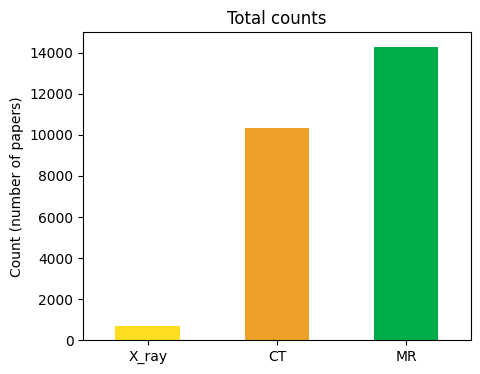

In [11]:
# Create Technique Total Counts Figure
fig_technique_total_counts = plt.figure(figsize=(5, 4))
technique_total_counts.plot(kind='bar', rot=0, title='Total counts', color=['#ffde21', '#ee9f27', '#00ae49'])

plt.ylabel('Count (number of papers)')

# Save plot
fig_technique_total_counts.savefig ('Results/Total_Counts_Tecnique.pdf', dpi=600, format='pdf')

##### **2.1.2. EDA - Technique - Correlation**

In [12]:
# Correlation between techniques
print('Spearman correlation')
df_technique.iloc[:,1:].corr(method='spearman').round(2)

Spearman correlation


,X_ray,CT,MR
X_ray,1.00,0.82,0.82
CT,0.82,1.00,0.97
MR,0.82,0.97,1.00


##### **2.1.3. EDA - Technique - Analysis of Trends over Time**

In [13]:
# Analysis of monotonic Technique Trends with Mann-Kendall test (Z -> direction; p-value -> significance; Var_S -> robustness)
technique_mks = {}
for column in df_technique.iloc[:,1:].columns:
    technique_mk = mk.original_test(df_technique[column])
    technique_mks[column] = {'Trend': technique_mk.trend,
                             'P-Value': technique_mk.p,
                             'Z-Statistic': round(technique_mk.z,2)}

df_technique_mks = pd.DataFrame(technique_mks).T

print('Mann-Kendall test')
df_technique_mks

Mann-Kendall test


,Trend,P-Value,Z-Statistic
X_ray,increasing,0.0,5.9
CT,increasing,0.0,8.02
MR,increasing,0.0,8.14


In [14]:
# Estimation of Technique Trends Sen's slope
technique_sens_slopes = {}
for column in df_technique.iloc[:,1:].columns:
    technique_sens_slope = mk.sens_slope(df_technique[column])
    technique_sens_slopes[column] = {'Slope': technique_sens_slope.slope,
                                     'Intercept': technique_sens_slope.intercept}

df_technique_sens_slopes = pd.DataFrame(technique_sens_slopes).T

print("Sen's slope")
df_technique_sens_slopes.round(2)

Sen's slope


,Slope,Intercept
X_ray,0.31,-4.85
CT,9.00,-70.00
MR,18.65,-148.39


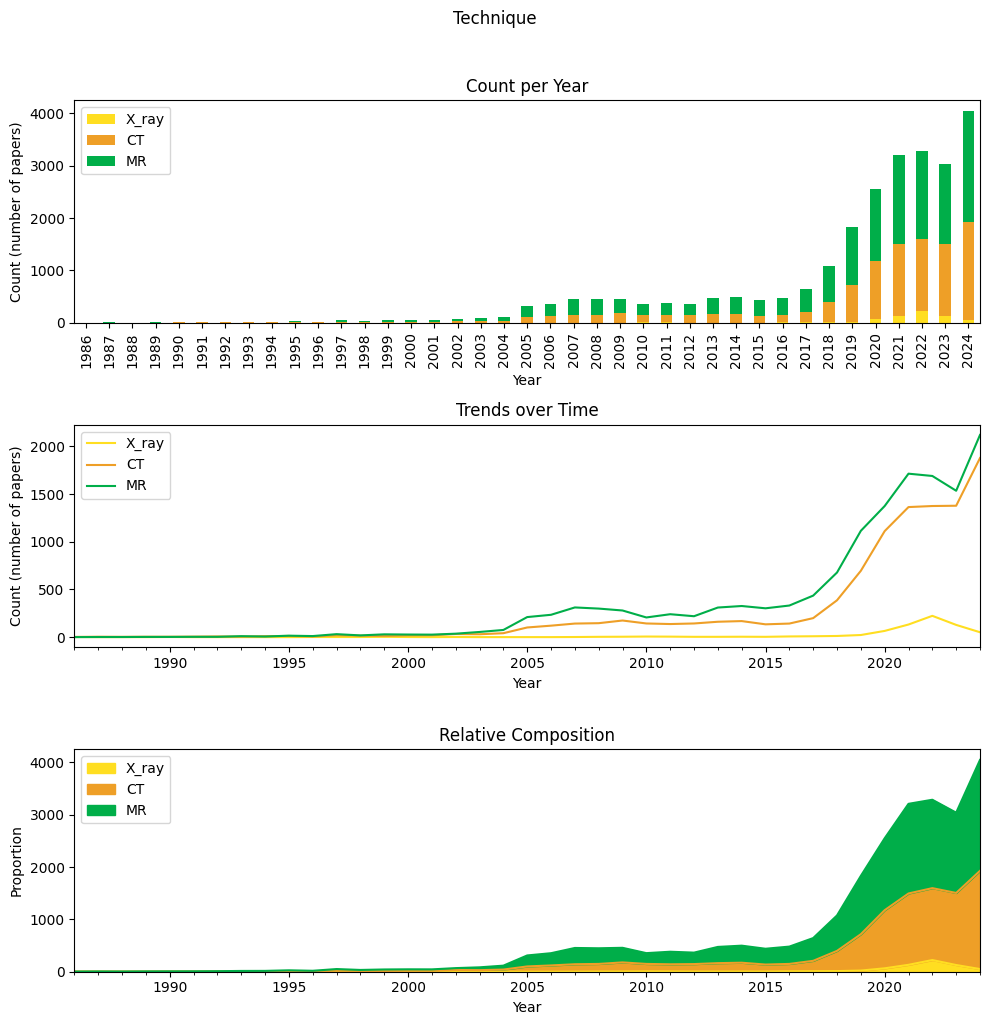

In [15]:
# Create figure with Technique Trends
fig_techniques, axs = plt.subplots(3, 1, figsize=(10, 10))
fig_techniques.suptitle('Technique', y=1.02)

# 1. Bar plot with total counts per year
df_technique.set_index('Year').plot(kind='bar', ax=axs[0], stacked=True, title='Count per Year', legend=True, color=['#ffde21', '#ee9f27', '#00ae49'])
axs[0].set_ylabel('Count (number of papers)')
axs[0].set_xlabel('Year')

# 2. Line graph
df_technique.set_index('Year').plot(kind='line', ax=axs[1], title='Trends over Time', legend=True, color=['#ffde21', '#ee9f27', '#00ae49'])
axs[1].set_ylabel('Count (number of papers)')
axs[1].set_xlabel('Year')

# 3. Stack Areas plot
df_technique.set_index('Year').plot(kind='area', ax=axs[2], stacked=True, title='Relative Composition', legend=True, color=['#ffde21', '#ee9f27', '#00ae49'])
axs[2].set_ylabel('Proportion')
axs[2].set_xlabel('Year')

# Adjust figure
plt.tight_layout()

# Save plot
fig_techniques.savefig ('Results/Trends_Tecnique.pdf', dpi=600, format='pdf')

# Show plot
plt.show()

#### **2.2. EDA - Body Region**

* 2.2.1. EDA - Body Region - Total Counts
* 2.2.2. EDA - Body Region - Correlation
* 2.2.3. EDA - Body Region - Analysis of Trends over Time

In [16]:
df_body_region = df_merge [['Year', 'Breast', 'Brain', 'Spinal_cord', 'Head_&_Neck', 
                            'Thorax', 'Abdomen', 'Bone', 'SoftTissue', 'Vacular']].copy()
df_body_region.tail(4)

,Year,Breast,Brain,Spinal_cord,Head_&_Neck,Thorax,Abdomen,Bone,SoftTissue,Vacular
35,2021,91,618,71,17,328,171,107,7,77
36,2022,72,504,44,25,252,196,109,5,62
37,2023,101,418,32,30,231,187,138,2,59
38,2024,86,789,83,43,277,261,219,5,109


##### **2.2.1. EDA - Body Region - Total Counts**

In [17]:
# Total Body Region Counts
body_region_total_counts = df_body_region.iloc[:,1:].sum(axis=0)
print(body_region_total_counts)

Breast          625
Brain          6053
Spinal_cord     528
Head_&_Neck     246
Thorax         1982
Abdomen        1494
Bone           1132
SoftTissue       31
Vacular         669
dtype: int64


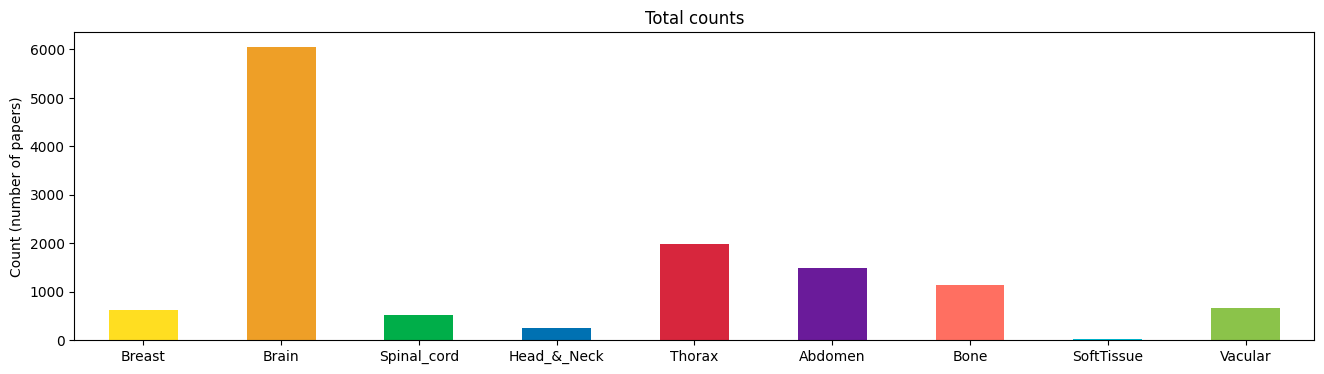

In [18]:
# Create Body Region Total Counts Figure
fig_body_region_total_counts = plt.figure(figsize=(16, 4))
body_region_total_counts.plot(kind='bar', rot=0, title='Total counts',
                              color = ['#ffde21', '#ee9f27', '#00ae49', '#0071b2', '#d7263d', '#6a1b9a', '#ff6f61', '#00bcd4', '#8bc34a'])

plt.ylabel('Count (number of papers)')

# Save plot
fig_body_region_total_counts.savefig ('Results/Total_Counts_Body_Region.pdf', dpi=600, format='pdf')

##### **2.2.2. EDA - Body Region - Correlation**

In [19]:
# Correlation between body regions
print('Spearman correlation')
df_body_region.iloc[:,1:].corr(method='spearman').round(2)

Spearman correlation


,Breast,Brain,Spinal_cord,Head_&_Neck,Thorax,Abdomen,Bone,SoftTissue,Vacular
Breast,1.00,0.95,0.90,0.89,0.95,0.96,0.93,0.67,0.90
Brain,0.95,1.00,0.89,0.90,0.98,0.93,0.93,0.66,0.93
Spinal_cord,0.90,0.89,1.00,0.88,0.90,0.87,0.86,0.68,0.85
Head_&_Neck,0.89,0.90,0.88,1.00,0.91,0.92,0.93,0.64,0.90
Thorax,0.95,0.98,0.90,0.91,1.00,0.92,0.94,0.65,0.93
Abdomen,0.96,0.93,0.87,0.92,0.92,1.00,0.95,0.69,0.89
Bone,0.93,0.93,0.86,0.93,0.94,0.95,1.00,0.70,0.91
SoftTissue,0.67,0.66,0.68,0.64,0.65,0.69,0.70,1.00,0.68
Vacular,0.90,0.93,0.85,0.90,0.93,0.89,0.91,0.68,1.00


##### **2.2.3. EDA - Body Region - Analysis of Trends over Time**

In [20]:
# Analysis of monotonic Body Regions trends with Mann-Kendall test (Z -> direction; p-value -> significance; Var_S -> robustness)
body_region_mks = {}
for column in df_body_region.iloc[:,1:].columns:
    body_region_mk = mk.original_test(df_body_region[column])
    body_region_mks[column] = {'Trend': body_region_mk.trend,
                               'P-Value': body_region_mk.p,
                               'Z-Statistic': round(body_region_mk.z,2)}

df_body_region_mks = pd.DataFrame(body_region_mks).T

print('Mann-Kendall test')
df_body_region_mks

Mann-Kendall test


,Trend,P-Value,Z-Statistic
Breast,increasing,0.0,7.5
Brain,increasing,0.0,7.85
Spinal_cord,increasing,0.0,6.58
Head_&_Neck,increasing,0.0,6.83
Thorax,increasing,0.0,7.35
Abdomen,increasing,0.0,7.66
Bone,increasing,0.0,7.57
SoftTissue,increasing,0.000015,4.33
Vacular,increasing,0.0,6.72


In [21]:
# Estimation of Body Regions Trends Sen's slope
body_region_sens_slopes = {}
for column in df_body_region.iloc[:,1:].columns:
    body_region_sens_slope = mk.sens_slope(df_body_region[column])
    body_region_sens_slopes[column] = {'Slope': body_region_sens_slope.slope,
                                       'Intercept': body_region_sens_slope.intercept}

df_body_region_sens_slopes = pd.DataFrame(body_region_sens_slopes).T

print("Sen's slope")
df_body_region_sens_slopes.round(2)

Sen's slope


,Slope,Intercept
Breast,0.53,-6.06
Brain,10.94,-100.88
Spinal_cord,0.64,-11.09
Head_&_Neck,0.35,-3.71
Thorax,1.82,-16.65
Abdomen,1.75,-24.25
Bone,1.65,-20.26
SoftTissue,0.00,0.00
Vacular,0.89,-9.89


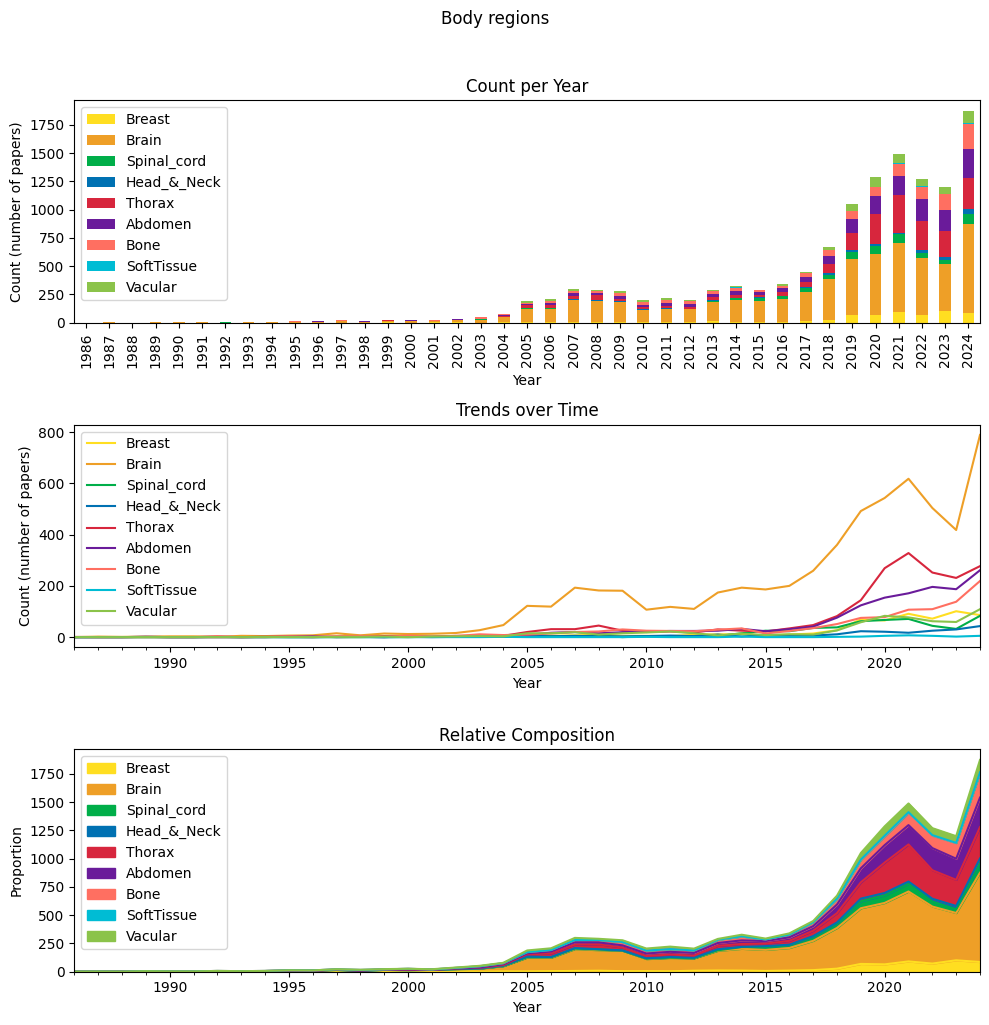

In [22]:
# Create Body Region Trends Figure
fig_body_regions, axs = plt.subplots(3, 1, figsize=(10, 10))
fig_body_regions.suptitle('Body regions', y=1.02)
body_region_colors = ['#ffde21', '#ee9f27', '#00ae49', '#0071b2', '#d7263d', '#6a1b9a', '#ff6f61', '#00bcd4', '#8bc34a']

# 1. Bar plot with total counts per year
df_body_region.set_index('Year').plot(kind='bar', ax=axs[0], stacked=True, title='Count per Year', legend=True, color=body_region_colors)
axs[0].set_ylabel('Count (number of papers)')
axs[0].set_xlabel('Year')

# 2. Line graph
df_body_region.set_index('Year').plot(kind='line', ax=axs[1], title='Trends over Time', legend=True, color=body_region_colors)
axs[1].set_ylabel('Count (number of papers)')
axs[1].set_xlabel('Year')

# 3. Stack Areas plot
df_body_region.set_index('Year').plot(kind='area', ax=axs[2], stacked=True, title='Relative Composition', legend=True, color=body_region_colors)
axs[2].set_ylabel('Proportion')
axs[2].set_xlabel('Year')

# Adjust figure
plt.tight_layout()

# Save plot
fig_body_regions.savefig ('Results/Trends_Body_Regions.pdf', dpi=600, format='pdf')

# Show plot
plt.show()

#### **2.3. EDA - Technique and Body Region**

* 2.3.1. EDA - Technique and Body Region - Total Counts
* 2.3.2. EDA - Technique and Body Region - Correlation
* 2.3.3. EDA - Technique and Body Region - Analysis of Trends over Time

In [23]:
df_tech_bregion = df_merge [['Year',
                             'Breast_Mammography', 'Breast_MR',
                             'Brain_CT', 'Brain_MR',
                             'Head_&_Neck_CT', 'Head_&_Neck_MR',
                             'Thorax_Lung_CT', 'Thorax_Heart_CT', 'Thorax_Heart_MR',
                             'Abdomen_Liver_CT', 'Abdomen_Liver_MR', 'Abdomen_Pancreas_MR',
                             'Abdomen_Kidney_CT', 'Abdomen_Kidney_MR', 'Abdomen_Prostate_MR',
                             'Bone_X_ray', 'Bone_CT', 'Bone_MR']].copy()
df_tech_bregion.tail(4)

,Year,Breast_Mammography,Breast_MR,Brain_CT,Brain_MR,Head_&_Neck_CT,Head_&_Neck_MR,Thorax_Lung_CT,Thorax_Heart_CT,Thorax_Heart_MR,Abdomen_Liver_CT,Abdomen_Liver_MR,Abdomen_Pancreas_MR,Abdomen_Kidney_CT,Abdomen_Kidney_MR,Abdomen_Prostate_MR,Bone_X_ray,Bone_CT,Bone_MR
35,2021,69,22,35,591,10,9,173,24,78,27,24,3,16,7,34,9,71,36
36,2022,50,25,22,489,16,11,114,25,64,18,24,4,12,8,61,8,58,47
37,2023,59,41,22,404,22,9,110,27,54,16,30,5,8,9,64,7,82,54
38,2024,57,31,50,762,30,16,148,32,76,50,26,6,22,15,76,5,151,77


##### **2.3.1. Technique and Body Region - Total Counts**

In [24]:
# Total Technique and Body Region Counts
tech_bregion_total_counts = df_tech_bregion.iloc[:,1:].sum(axis=0)
print(tech_bregion_total_counts)

Breast_Mammography      406
Breast_MR               232
Brain_CT                285
Brain_MR               5876
Head_&_Neck_CT          152
Head_&_Neck_MR          112
Thorax_Lung_CT          934
Thorax_Heart_CT         226
Thorax_Heart_MR         583
Abdomen_Liver_CT        246
Abdomen_Liver_MR        163
Abdomen_Pancreas_MR      28
Abdomen_Kidney_CT       135
Abdomen_Kidney_MR        82
Abdomen_Prostate_MR     378
Bone_X_ray               49
Bone_CT                 761
Bone_MR                 384
dtype: int64


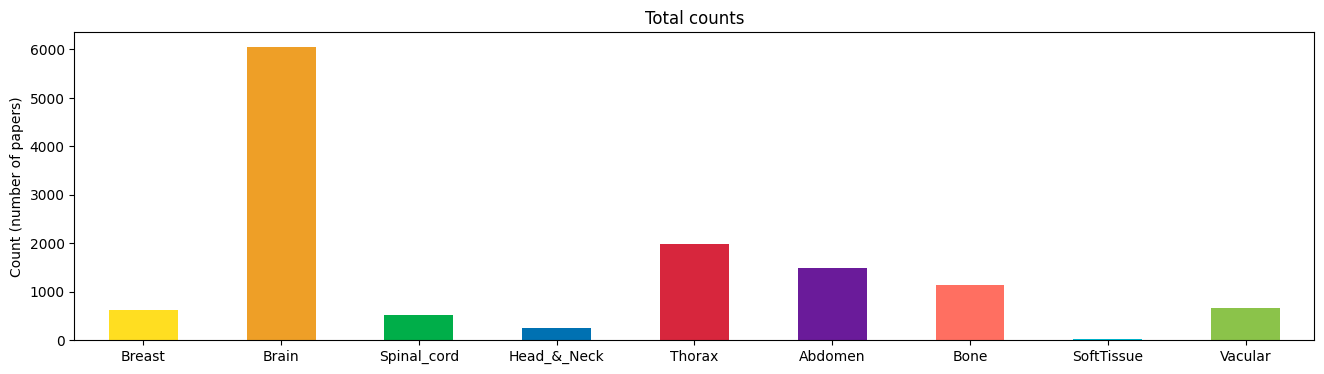

In [25]:
# Create Body Region Total Counts Figure
fig_tech_bregion_total_counts = plt.figure(figsize=(16, 4))
body_region_total_counts.plot(kind='bar', rot=0, title='Total counts',
                              color = ['#ffde21', '#ee9f27', '#00ae49', '#0071b2', '#d7263d', '#6a1b9a', '#ff6f61', '#00bcd4', '#8bc34a', 
                                       '#ff5722', '#3f51b5', '#cddc39', '#795548', '#9c27b0', '#03a9f4', '#ff9800', '#e91e63', '#607d8b'])

plt.ylabel('Count (number of papers)')

# Save plot
fig_tech_bregion_total_counts.savefig ('Results/Total_Counts_Tecnique_and_Body_Region.pdf', dpi=600, format='pdf')

##### **2.3.2. EDA - Technique and Body Region - Correlation**

In [26]:
# Correlation between technique and body regions
print('Spearman correlation')
df_tech_bregion.iloc[:,1:].corr(method='spearman').round(2)

Spearman correlation


,Breast_Mammography,Breast_MR,Brain_CT,Brain_MR,Head_&_Neck_CT,Head_&_Neck_MR,Thorax_Lung_CT,Thorax_Heart_CT,Thorax_Heart_MR,Abdomen_Liver_CT,Abdomen_Liver_MR,Abdomen_Pancreas_MR,Abdomen_Kidney_CT,Abdomen_Kidney_MR,Abdomen_Prostate_MR,Bone_X_ray,Bone_CT,Bone_MR
Breast_Mammography,1.00,0.85,0.82,0.93,0.80,0.86,0.91,0.89,0.88,0.88,0.83,0.60,0.85,0.90,0.92,0.74,0.91,0.89
Breast_MR,0.85,1.00,0.76,0.88,0.84,0.81,0.88,0.88,0.90,0.81,0.75,0.53,0.90,0.85,0.87,0.63,0.85,0.85
Brain_CT,0.82,0.76,1.00,0.81,0.79,0.81,0.82,0.82,0.77,0.84,0.84,0.60,0.80,0.77,0.90,0.67,0.84,0.84
Brain_MR,0.93,0.88,0.81,1.00,0.79,0.92,0.96,0.89,0.94,0.90,0.86,0.61,0.86,0.89,0.91,0.71,0.91,0.95
Head_&_Neck_CT,0.80,0.84,0.79,0.79,1.00,0.79,0.84,0.82,0.78,0.76,0.76,0.63,0.86,0.83,0.87,0.65,0.85,0.80
Head_&_Neck_MR,0.86,0.81,0.81,0.92,0.79,1.00,0.91,0.86,0.86,0.79,0.87,0.67,0.82,0.84,0.88,0.64,0.84,0.90
Thorax_Lung_CT,0.91,0.88,0.82,0.96,0.84,0.91,1.00,0.89,0.95,0.87,0.86,0.61,0.88,0.90,0.93,0.77,0.93,0.96
Thorax_Heart_CT,0.89,0.88,0.82,0.89,0.82,0.86,0.89,1.00,0.89,0.89,0.82,0.55,0.92,0.90,0.88,0.72,0.90,0.87
Thorax_Heart_MR,0.88,0.90,0.77,0.94,0.78,0.86,0.95,0.89,1.00,0.89,0.80,0.54,0.90,0.89,0.87,0.71,0.90,0.94
Abdomen_Liver_CT,0.88,0.81,0.84,0.90,0.76,0.79,0.87,0.89,0.89,1.00,0.80,0.57,0.86,0.86,0.86,0.73,0.89,0.88


##### **2.3.3. EDA - Technique and Body Region - Analysis of Trends over Time**

In [27]:
# Analysis of monotonic Technique and Body Regions trends with Mann-Kendall test (Z -> direction; p-value -> significance; Var_S -> robustness)
tech_bregion_mks = {}
for column in df_tech_bregion.iloc[:,1:].columns:
    tech_bregion_mk = mk.original_test(df_tech_bregion[column])
    tech_bregion_mks[column] = {'Trend': tech_bregion_mk.trend,
                                'P-Value': tech_bregion_mk.p,
                                'Z-Statistic': round(tech_bregion_mk.z,2)}

df_tech_bregion_mks = pd.DataFrame(tech_bregion_mks).T

print('Mann-Kendall test')
df_tech_bregion_mks

Mann-Kendall test


,Trend,P-Value,Z-Statistic
Breast_Mammography,increasing,0.0,7.16
Breast_MR,increasing,0.0,6.22
Brain_CT,increasing,0.0,5.71
Brain_MR,increasing,0.0,7.87
Head_&_Neck_CT,increasing,0.0,6.25
Head_&_Neck_MR,increasing,0.0,6.38
Thorax_Lung_CT,increasing,0.0,7.31
Thorax_Heart_CT,increasing,0.0,6.32
Thorax_Heart_MR,increasing,0.0,6.66
Abdomen_Liver_CT,increasing,0.0,6.33


In [28]:
# Estimation of Technique and Body Regions Trends Sen's slope
tech_bregion_sens_slopes = {}
for column in df_tech_bregion.iloc[:,1:].columns:
    tech_bregion_sens_slope = mk.sens_slope(df_tech_bregion[column])
    tech_bregion_sens_slopes[column] = {'Slope': tech_bregion_sens_slope.slope,
                                        'Intercept': tech_bregion_sens_slope.intercept}

df_tech_bregion_sens_slopes= pd.DataFrame(tech_bregion_sens_slopes).T

print("Sen's slope")
df_tech_bregion_sens_slopes.round(2)

Sen's slope


,Slope,Intercept
Breast_Mammography,0.38,-6.31
Breast_MR,0.20,-1.80
Brain_CT,0.27,-2.18
Brain_MR,10.62,-97.88
Head_&_Neck_CT,0.20,-2.80
Head_&_Neck_MR,0.20,-2.80
Thorax_Lung_CT,0.75,-7.25
Thorax_Heart_CT,0.38,-5.21
Thorax_Heart_MR,0.62,-6.88
Abdomen_Liver_CT,0.36,-4.91


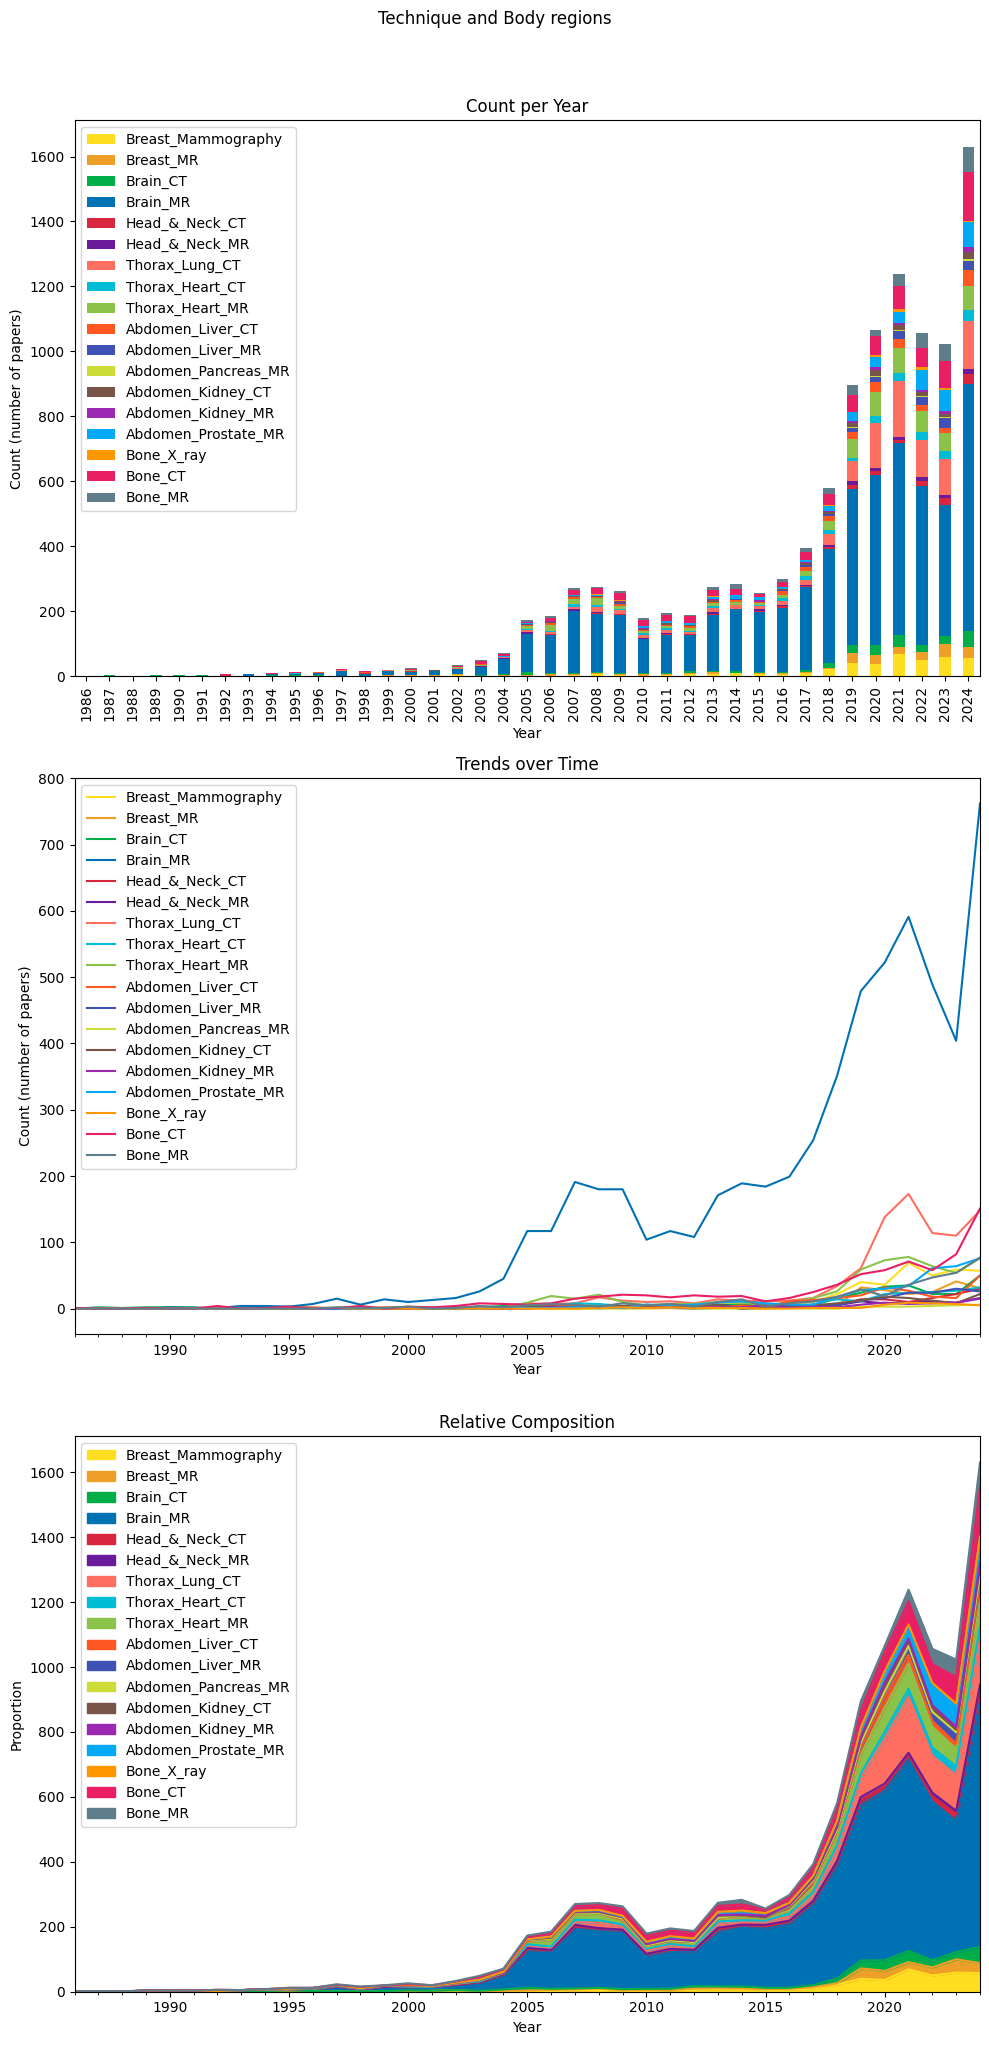

In [29]:
# Create Technique and Body Region Trends Figure
fig_tech_bregion, axs = plt.subplots(3, 1, figsize=(10, 20))
fig_tech_bregion.suptitle('Technique and Body regions', y=1.02)
tech_bregion_colors = ['#ffde21', '#ee9f27', '#00ae49', '#0071b2', '#d7263d', '#6a1b9a', '#ff6f61', '#00bcd4', '#8bc34a', 
                       '#ff5722', '#3f51b5', '#cddc39', '#795548', '#9c27b0', '#03a9f4', '#ff9800', '#e91e63', '#607d8b']

# 1. Bar plot with total counts per year
df_tech_bregion.set_index('Year').plot(kind='bar', ax=axs[0], stacked=True, title='Count per Year', legend=True, color=tech_bregion_colors)
axs[0].set_ylabel('Count (number of papers)')
axs[0].set_xlabel('Year')

# 2. Line graph
df_tech_bregion.set_index('Year').plot(kind='line', ax=axs[1], title='Trends over Time', legend=True, color=tech_bregion_colors)
axs[1].set_ylabel('Count (number of papers)')
axs[1].set_xlabel('Year')

# 3. Stack Areas plot
df_tech_bregion.set_index('Year').plot(kind='area', ax=axs[2], stacked=True, title='Relative Composition', legend=True, color=tech_bregion_colors)
axs[2].set_ylabel('Proportion')
axs[2].set_xlabel('Year')

# Adjust figure
plt.tight_layout()

# Save plot
fig_tech_bregion.savefig ('Results/Trends_Technique_and_Body_Regions.pdf', dpi=600, format='pdf')

# Show plot
plt.show()